In [1]:
# ==============
# !!! SET UP !!!
# ==============

from astropy.io import fits
import os
import numpy as np
import string
import re

pathin = '/home/ambra/Desktop/cluster-morgana/run0406_test/run0406/' 
path = pathin + 'run0406_ID000126/'
pathout = path + 'data/'
template = 'run0406_ID000126_ebl.fits'

hdul =  fits.open(pathin + template)
hdul.info()

# energybins [GeV]
energy=np.array(hdul[1].data)
# timebins [s]
time=np.array(hdul[2].data)
# spectra [fotoni/GeV/cm^2/s]
spectra=np.array(hdul[3].data)
# ebl [fotoni/GeV/cm^2/s]
ebl=np.array(hdul[4].data)

Nt=len(time)
Ne=len(energy)
print('energy', Ne, 'time', Nt)

print('done')

Filename: /home/ambra/Desktop/cluster-morgana/run0406_test/run0406/run0406_ID000126_ebl.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  ENERGIES      1 BinTableHDU     13   41R x 1C   [E]   
  2  TIMES         1 BinTableHDU     13   71R x 1C   [E]   
  3  SPECTRA       1 BinTableHDU     92   71R x 41C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  4  EBL GILMORE    1 BinTableHDU     92   71R x 41C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
energy 41 time 71
done


/home/ambra/anaconda3/envs/ctools-1.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/ambra/anaconda3/envs/ctools-1.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/ambra/anaconda3/envs/ctools-1.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/ambra/anaconda3/envs/ctools-1.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:105: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


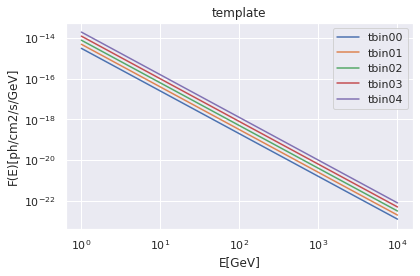

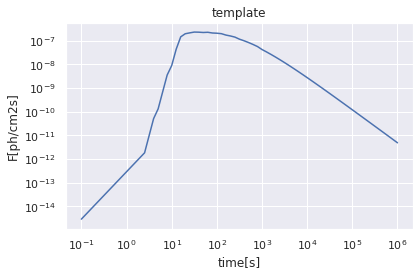

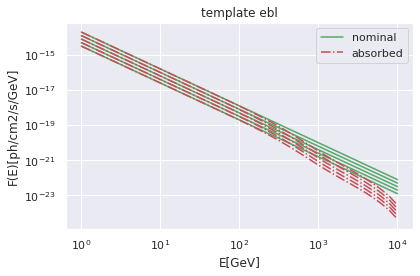

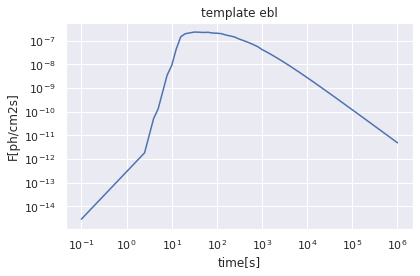

In [3]:
# =====================
# !!! PLOT TEMPLATE !!!
# =====================

import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import seaborn as sns


sns.set()

# TIME GRID ---!
t=[0.0 for x in range(Nt+1)]
for i in range(Nt-1):
    t[i+1]=time[i][0]+(time[i+1][0]-time[i][0])/2
# last bin
t[Nt]=time[Nt-1][0]+(time[Nt-1][0]-t[Nt-1])


# ENERGY GRID ---!
en=[1.0 for x in range(Ne+1)]
for i in range(Ne-1):
    en[i+1]=energy[i][0]+(energy[i+1][0]-energy[i][0])/2
# last bin
en[Ne]=energy[Ne-1][0]+(energy[Ne-1][0]-en[Ne-1])


# FLUX SPECTRA ---!
f=[0.0 for x in range(Nt)]
for i in range(Nt):
    f[i]=0
    for j in range(Ne):
        #print energy[j][0],spectra[i][j]
        f[i]=f[i]+spectra[i][j]*(en[j+1]-en[j])


# FLUX EBL ---!
f2=[0.0 for x in range(Nt)]
for i in range(Nt):
    f2[i]=0
    for j in range(Ne):
        #print energy[j][0],spectra[i][j]
        f2[i]=f2[i]+ebl[i][j]*(en[j+1]-en[j])

        
# first 10 bins spectra ---!
fig1=plt.figure(1)
for i in range(5):
    x=[]
    y=[]
    for j in range(Ne):
        x.append(energy[j][0])
        y.append(spectra[i][j])
    plt.loglog(x,y, label='tbin%02d' %i)
    plt.title('template')
    plt.xlabel('E[GeV]')
    plt.ylabel('F(E)[ph/cm2/s/GeV]')
    plt.legend()
plt.tight_layout()
fig1.savefig('template_spectra.png')
fig1.show()


# lightcurve ---!
fig2=plt.figure(2)
plt.loglog(time,f)
plt.title('template')
plt.xlabel('time[s]')
plt.ylabel('F[ph/cm2s]')
plt.tight_layout()
fig2.savefig('template_lightcurve.png')
fig2.show()

# first 10 bins ebl ---!
fig3=plt.figure(3)
for i in range(5):
    x=[]
    y=[]
    z=[]
    for j in range(Ne):
        x.append(energy[j][0])
        y.append(spectra[i][j])
        z.append(ebl[i][j])
    plt.loglog(x,y, 'g-', label='nominal')
    plt.loglog(x,z, 'r-.', label='absorbed')
    plt.title('template ebl')
    plt.xlabel('E[GeV]')
    plt.ylabel('F(E)[ph/cm2/s/GeV]')
    plt.legend() if i == 0 else None
plt.tight_layout()
fig3.savefig('template_spectra_ebl.png')
fig3.show()


# lightcurve ebl ---!
fig4=plt.figure(4)
plt.loglog(time,f2)
plt.title('template ebl')
plt.xlabel('time[s]')
plt.ylabel('F[ph/cm2s]')
plt.tight_layout()
fig4.savefig('template_lightcurve_ebl.png')
fig4.show()



In [ ]:
# =====================
# !!! SIMULATE TEST !!!
# =====================

import gammalib
import ctools
import cscripts
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import sys


logo='off_true_zs0_100s'
pathout=pathin + 'sim/'



# spectra
for i in range(40):
    sim = ctools.ctobssim()
    #sim["inmodel"] = "${CTOOLS}/share/models/crab.xml"
    sim["inmodel"] = pathout+"run0406_ID000126_tbin"+str(i)+".xml"
    sim["outevents"] = pathout+"events_"+logo+"_tbin"+str(i)+".fits"
    sim["caldb"] = "prod3b"
    sim["irf"] = "South_z40_average_100s"
# --- true coordinates
#   sim["ra"] = 33.057
#   sim["dec"] =  -51.841
# --- offset
    sim["ra"] = 31.582
    sim["dec"] =  -53.211
    sim["rad"] = 5.0
    sim["tmin"] = t[i]
    sim["tmax"] = t[i+1]
    sim["emin"] = 0.03
    sim["emax"] = 0.5
    #sim["logfile"] = "ctobssim.log"
    sim.execute()
    # if you don't want an event file type
    #sim.run()

    print ''
    print 'simulated events in time bin=', str(i)
    # after having typed sim.run() the ctobssim class still exists as an object in memory, including all the simulated events. The ctobssim class has an obs() method that returns an observation container that holds the simulated CTA observation with its associated events. To visualise this container, type:
    print(sim.obs())

    # to visualize events in the observation n.1 type
    print(sim.obs()[0].events())

    #The obs()[0] operator returns the first observation in the observation container, the events() operator returns the event list in that observation. To see what kind of object you actually got, use:
    type(sim.obs()[0].events())



# observatiion list
xml     = gammalib.GXml()
obslist = xml.append('observation_list title="observation library"')
for i in range(40):
    obs = obslist.append('observation name="run0406_ID000126" id="%02d" instrument="CTA"' % (i))
    obs.append('parameter name="EventList" file="'+pathout+'events_'+logo+'_tbin%d.fits"' % (i))
xml.save('obs_'+logo+'.xml')



# ebl
for i in range(40):
    sim = ctools.ctobssim()
    #sim["inmodel"] = "${CTOOLS}/share/models/crab.xml"
    sim["inmodel"] = pathout+"run0406_ID000126_tbin"+str(i)+".xml"
    sim["outevents"] = pathout+"events_"+logo+"_tbin"+str(i)+".fits"
    sim["caldb"] = "prod3b"
    sim["irf"] = "South_z40_average_100s"
# --- true coordinates
#   sim["ra"] = 33.057
#   sim["dec"] =  -51.841
# --- offset
    sim["ra"] = 31.582
    sim["dec"] =  -53.211
    sim["rad"] = 5.0
    sim["tmin"] = t[i]
    sim["tmax"] = t[i+1]
    sim["emin"] = 0.03
    sim["emax"] = 0.5
    #sim["logfile"] = "ctobssim.log"
    sim.execute()
    # if you don't want an event file type
    #sim.run()

    print ''
    print 'simulated events in time bin=', str(i)
    # after having typed sim.run() the ctobssim class still exists as an object in memory, including all the simulated events. The ctobssim class has an obs() method that returns an observation container that holds the simulated CTA observation with its associated events. To visualise this container, type:
    print(sim.obs())

    # to visualize events in the observation n.1 type
    print(sim.obs()[0].events())

    #The obs()[0] operator returns the first observation in the observation container, the events() operator returns the event list in that observation. To see what kind of object you actually got, use:
    type(sim.obs()[0].events())



# observatiion list
xml     = gammalib.GXml()
obslist = xml.append('observation_list title="observation library"')
for i in range(40):
    obs = obslist.append('observation name="run0406_ID000126" id="%02d" instrument="CTA"' % (i))
    obs.append('parameter name="EventList" file="'+pathout+'events_'+logo+'_tbin%d.fits"' % (i))
xml.save('obs_'+logo+'.xml')